# K-Means
* El objetivo es clasificar en grupos datos NO ETIQUETADOS

### Resultados del Algoritmo
* Los centroides de cada grupo
* Etiqueta de cada dato sobre el cluster asignado

### Definir criterio de parada
    * El criterio puede ser :
        * Lo centroides de los cluteres no cambian
        * Los puntos permanecen en el mismo grupo
        * Se alcanza el nro maximo de iteracciones

### Identificar buenos grupos de resultado
* Inercia: Se busca un valor bajo de inercia. Muestra la distancia de los datos entre dos clusteres
* Punto de la Silueta: Indica la distancia entre los puntos de dos clusteres diferentes. Su puntuacion se da de -1 a 1 siendo -1 un mal resultado y 1 un muy buen resultado


---------------------------

# Implementacion Algoritmos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
clientes = pd.read_csv("Clientes Ventas.csv")

#Seleccionando las columnas que se usaran
clientes = clientes.iloc[:, 2:]

#Cambiando el nombre de las columnas
clientes.columns=["Verduras", "Leche", "Comestibles", "Congelados","PapelyDetergentes","Otros"]

In [3]:
#Anlizando si hay datos perdidos
clientes.isnull().sum() #No faltan datos.

Verduras             0
Leche                0
Comestibles          0
Congelados           0
PapelyDetergentes    0
Otros                0
dtype: int64

In [4]:
# Analizando el tipo de datos
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Verduras           440 non-null    int64
 1   Leche              440 non-null    int64
 2   Comestibles        440 non-null    int64
 3   Congelados         440 non-null    int64
 4   PapelyDetergentes  440 non-null    int64
 5   Otros              440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


### Seleccioando una Muestra para luego categorizarlo

In [5]:
indices = [65, 123, 365]
muestras=pd.DataFrame(clientes.loc[indices])
clientes = clientes.drop(indices, axis=0) # Se eliminan del DF original para que el modelo no los tome
muestras

,Verduras,Leche,Comestibles,Congelados,PapelyDetergentes,Otros
65,85,20959,45828,36,24231,1423
123,11170,10769,8814,2194,1976,143
365,4692,6128,8025,1619,4515,3105


## Escalando los datos

In [42]:
from sklearn import preprocessing

data_escalada = preprocessing.Normalizer().fit_transform(clientes)
#data_escalada

muestras= preprocessing.Normalizer().fit_transform(muestras)

array([[1.51963657e-03, 3.74706621e-01, 8.19316525e-01, 6.43610782e-04,
        4.33203690e-01, 2.54405039e-02],
       [6.17546139e-01, 5.95376399e-01, 4.87292003e-01, 1.21297782e-01,
        1.09245405e-01, 7.90591745e-03],
       [3.74922006e-01, 4.89667957e-01, 6.41250874e-01, 1.29368868e-01,
        3.60778529e-01, 2.48110151e-01]])

### Usando el Modelo

In [24]:
from sklearn.cluster import KMeans

In [25]:
# Definiendo datos para el algoritmo
x = data_escalada

## Metodo del codo para definir el numero de clusters

In [36]:
inercia = []
for i in range(1,20):
    algoritmo = KMeans(n_clusters=i, init= "k-means++",
                       max_iter=300, n_init=10)
    algoritmo.fit(x)
    
    #Se calcula para cada k, la suma total del cuadrado dentro del cluster
    inercia.append(algoritmo.inertia_)

C:\Users\Arley\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


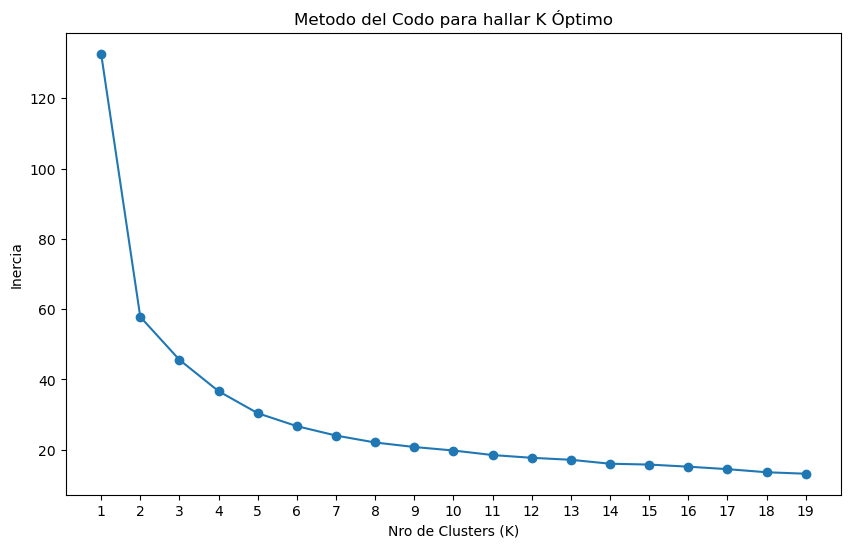

In [34]:
#### Graficando para determinar el K optimo
plt.figure(figsize=(10,6))
plt.plot(list(range(1,20)), inercia, marker="o")
plt.xticks(range(1,20))
plt.title("Metodo del Codo para hallar K Óptimo")
plt.xlabel("Nro de Clusters (K)")
plt.ylabel("Inercia")
plt.show()

#PARA ESTE CASO SE TOMARA K=5 Aunque es un poco dudoso

In [38]:
## Definiendo el algoritmo con K optimo
algoritmo = KMeans(n_clusters=5, init= "k-means++", #init= Metodo de inicializacion del algoritmo
                       max_iter=300, n_init=10) # n_init= Nro de veces que el algoritmo se ejecuta con diferentes centroides
algoritmo.fit(x)

KMeans(n_clusters=5)

### Obteniendo Centroides y etiquetas

In [43]:
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

### Predicciones de Nuevos Datos

In [53]:
predicciones = algoritmo.predict(muestras)

for i, j in enumerate(predicciones):
    print(f"El valor {i} se encuentra en el cluster {j}")

El valor 0 se encuentra en el cluster 1
El valor 1 se encuentra en el cluster 0
El valor 2 se encuentra en el cluster 1
